In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')
from scripts.standarise_data import count_spectrums

Exploring the processed spectrums before the merging step

In [ ]:
from matchms.importing import load_from_msp
spectrums=[]
spectrums = list(load_from_msp('xaf.msp'))

In [3]:
count_spectrums(spectrums)

Total number of spectra: 8957
Total number of unique chemicals: 1541
Average number of spectrums per unique chemical: 5.81245944192083


(<Figure size 2800x2400 with 8 Axes>,
 array([[<Axes: xlabel='m/z', ylabel='Intensity'>,
         <Axes: xlabel='m/z', ylabel='Intensity'>],
        [<Axes: xlabel='m/z', ylabel='Intensity'>,
         <Axes: xlabel='m/z', ylabel='Intensity'>],
        [<Axes: xlabel='m/z', ylabel='Intensity'>,
         <Axes: xlabel='m/z', ylabel='Intensity'>],
        [<Axes: xlabel='m/z', ylabel='Intensity'>,
         <Axes: xlabel='m/z', ylabel='Intensity'>]], dtype=object))

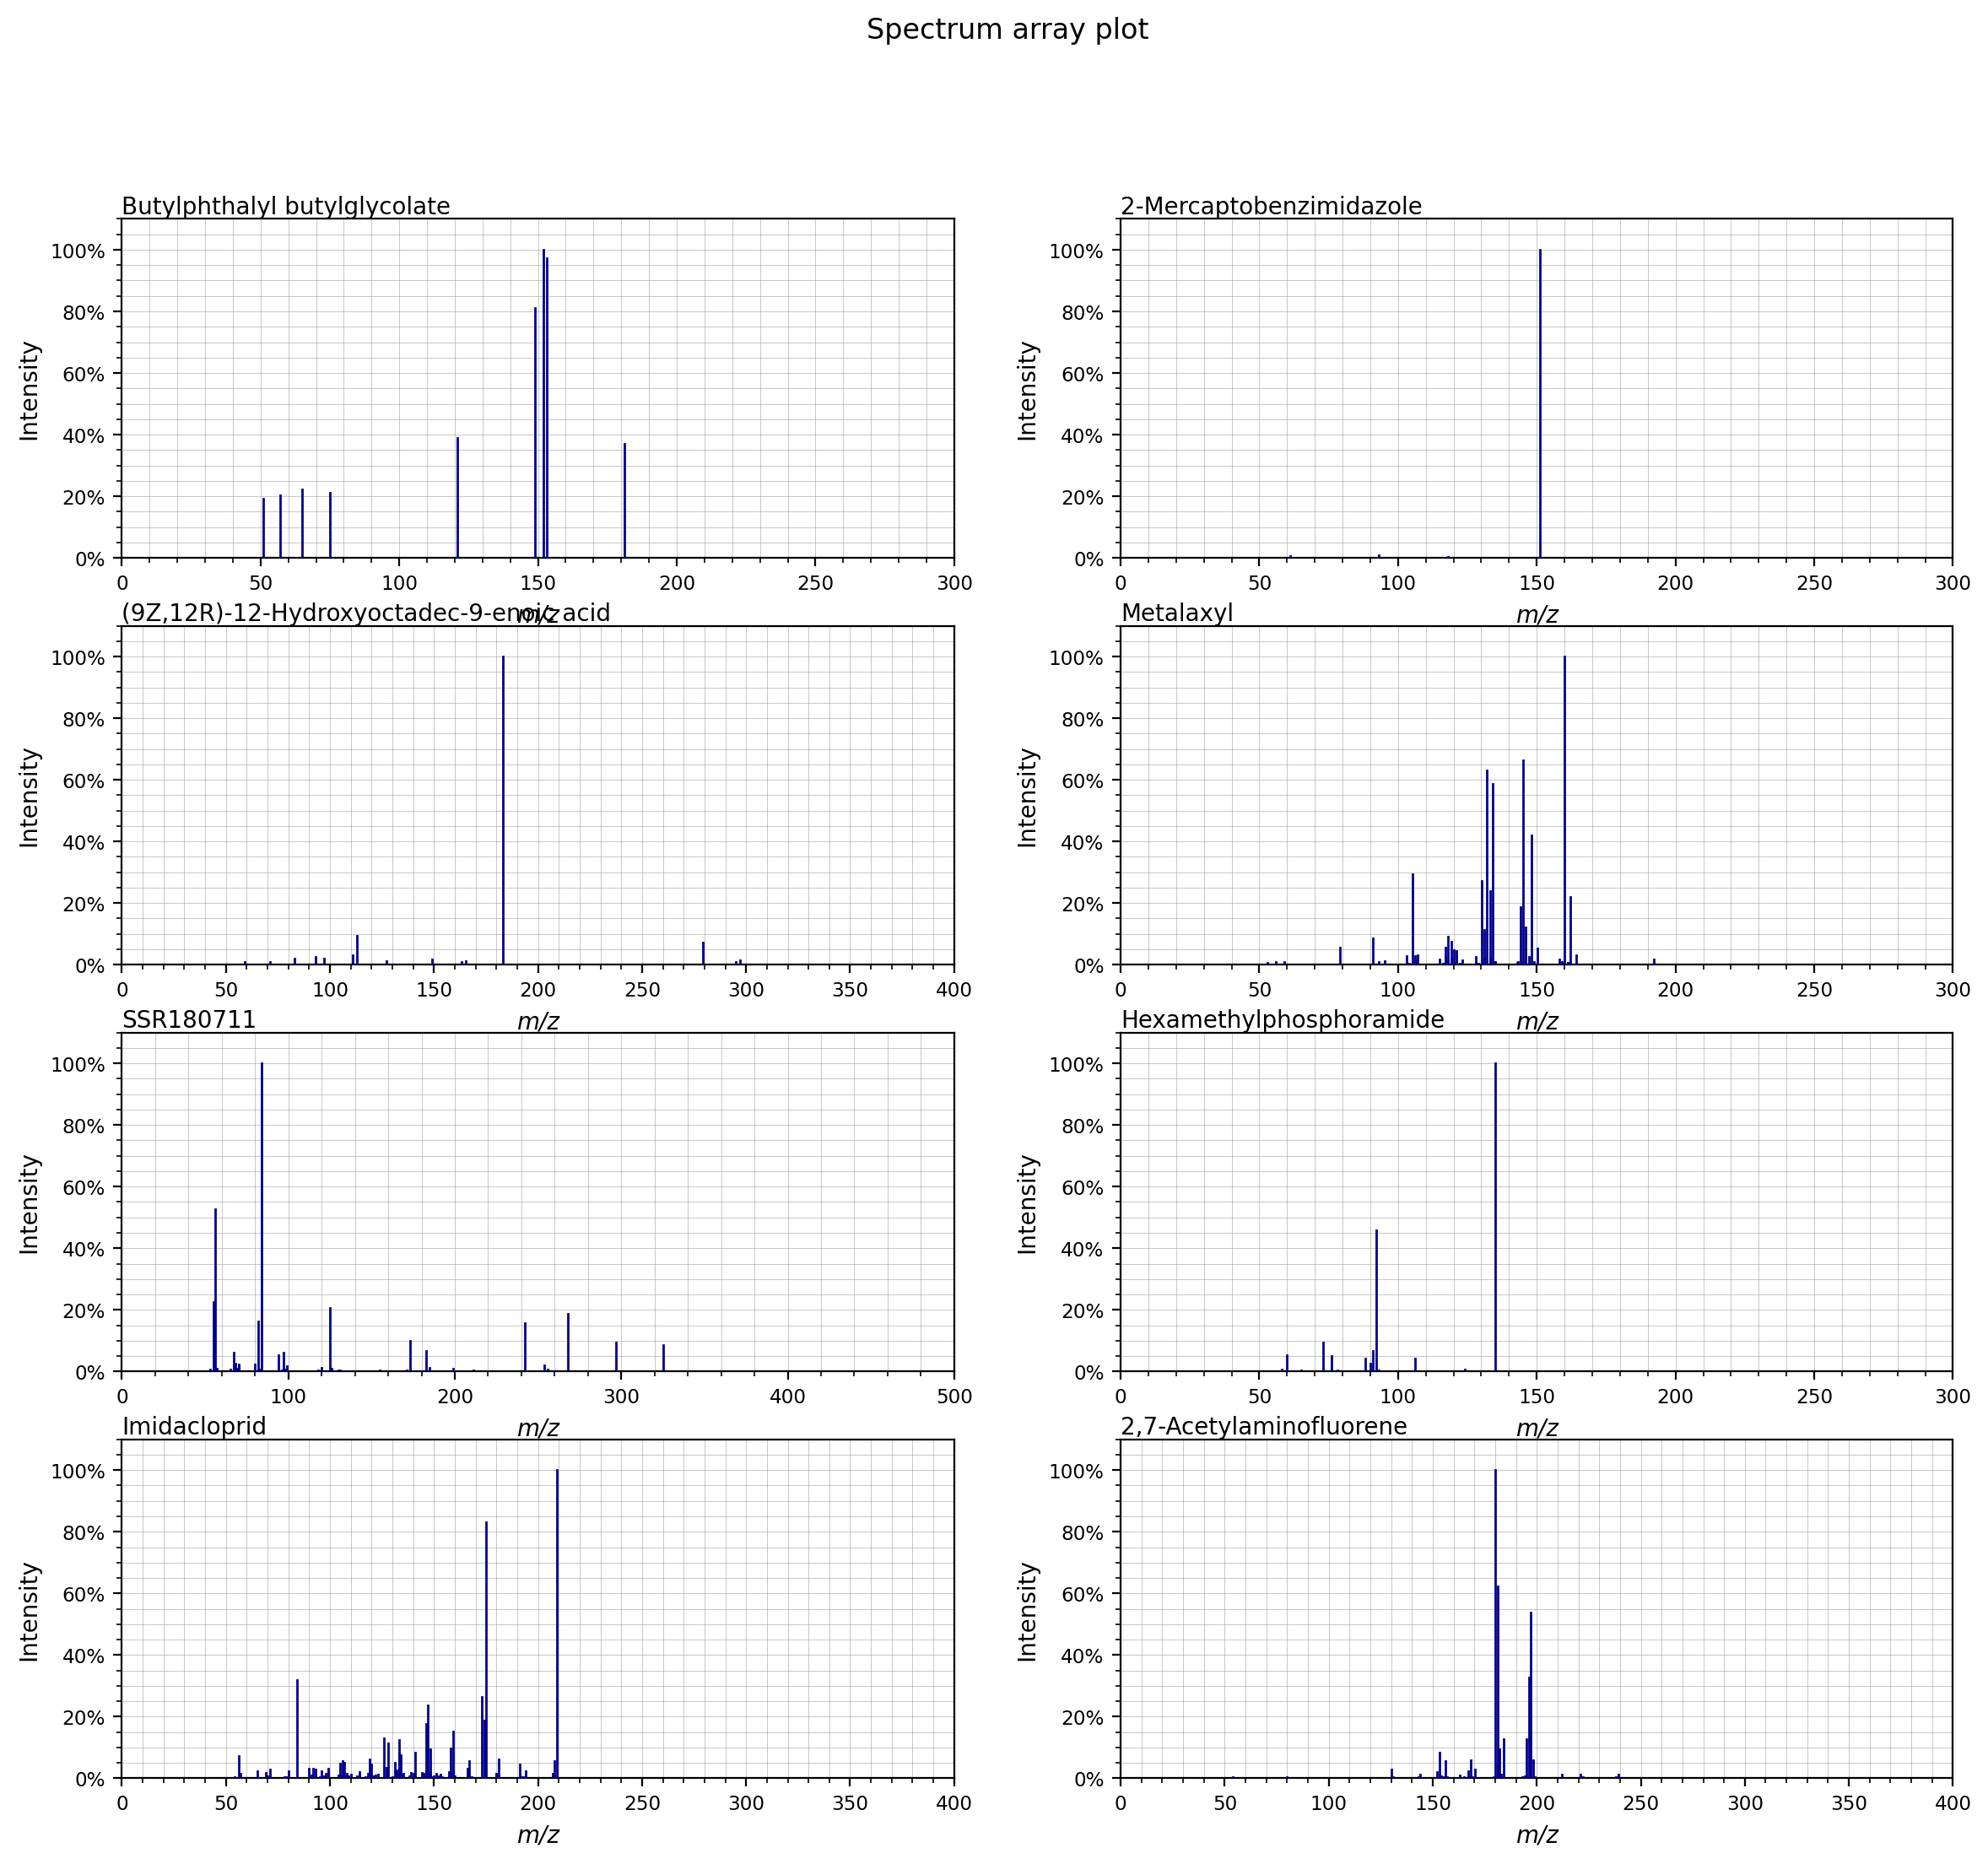

In [4]:
from matchms.plotting import plot_spectra_array
plot_spectra_array(spectrums[:8])

In [5]:
spectrums[4].metadata

{'synon': '(4-bromophenyl) 1,4-diazabicyclo[3.2.2]nonane-4-carboxylate',
 'inchikey': 'RXLOZRCLQMJJLC-UHFFFAOYSA-N',
 'inchi': 'InChI=1S/C14H17BrN2O2/c15-11-1-3-13(4-2-11)19-14(18)17-10-9-16-7-5-12(17)6-8-16/h1-4,12H,5-10H2',
 'smiles': 'BrC1=CC=C(OC(=O)N2CCN3CCC2CC3)C=C1',
 'instrument_type': 'LC-ESI-QFT',
 'instrument': 'Q Exactive Orbitrap (Thermo Scientific)',
 'collision_energy': '60',
 'formula': 'C14H17BrN2O2',
 'parent': 325.0546,
 'splash': 'splash10-053r-9110000000-71eb5a15ac02cc0ca7d8',
 'num_peaks': '61',
 'compound_name': 'SSR180711',
 'spectrum_id': 'MSBNK-LCSB-LU054004',
 'adduct': '[M+H]+',
 'ms_level': 'MS2',
 'precursor_mz': 325.0546,
 'ionmode': 'positive',
 'nominal_mass': '324',
 'parent_mass': '324.0473'}

Precursor graph distribution of the filtered spectrums (tox21 list, ms2, LC-ESI)

In [6]:
inchikeys=[s.get('inchikey') for s in spectrums]

precursors=[(float(s.get('parent_mass'))) for s in spectrums]
sorted_precursors = sorted(precursors)

len_peaks=[int(s.get('num_peaks')) for s in spectrums]
sorted_len_peaks=sorted(len_peaks, reverse=True)


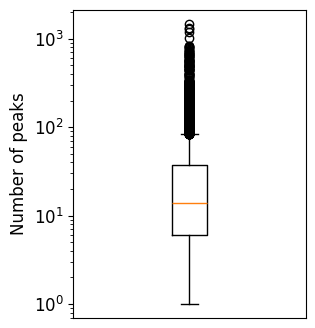

<Figure size 600x400 with 0 Axes>

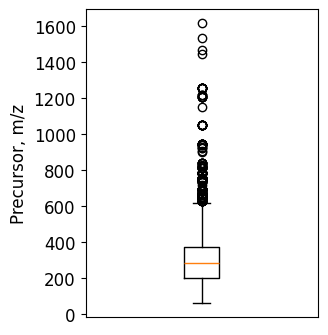

In [7]:
plt.figure(figsize=(3, 4))
plt.boxplot(len_peaks)
plt.xlabel('')
plt.ylabel('Number of peaks',fontsize=12)
plt.xticks([])
plt.semilogy()
plt.tick_params(axis='both', labelsize=12)
#plt.savefig('NumberPeaks.pdf', bbox_inches='tight')
plt.figure(figsize=(6, 4))
plt.show()

plt.figure(figsize=(3, 4))
plt.boxplot(precursors)
plt.xlabel('')
plt.ylabel('Precursor, m/z',fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.xticks([])
#plt.savefig('Precursors.pdf', bbox_inches='tight')
plt.show()